In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
data = {
    "OrderID": [1001, 1002, 1003, 1004, 1005, 1006],
    "Product": ["Laptop", "Mouse", "Keyboard", "Monitor", "Laptop", "Mouse"],
    "Category": ["Electronics", "Accessories", "Accessories", "Electronics", "Electronics", "Accessories"],
    "Price": [70000, 500, 1500, 12000, 72000, 550],
    "Quantity": [1, 2, 1, 2, 1, 3],
    "Date": pd.to_datetime(["2023-01-10", "2023-01-10", "2023-01-11", "2023-01-12", "2023-01-12", "2023-01-13"])
}
df = pd.DataFrame(data)
df


,OrderID,Product,Category,Price,Quantity,Date
0,1001,Laptop,Electronics,70000,1,2023-01-10
1,1002,Mouse,Accessories,500,2,2023-01-10
2,1003,Keyboard,Accessories,1500,1,2023-01-11
3,1004,Monitor,Electronics,12000,2,2023-01-12
4,1005,Laptop,Electronics,72000,1,2023-01-12
5,1006,Mouse,Accessories,550,3,2023-01-13


In [3]:
df["Revenue"] = df["Price"] * df["Quantity"]
df


,OrderID,Product,Category,Price,Quantity,Date,Revenue
0,1001,Laptop,Electronics,70000,1,2023-01-10,70000
1,1002,Mouse,Accessories,500,2,2023-01-10,1000
2,1003,Keyboard,Accessories,1500,1,2023-01-11,1500
3,1004,Monitor,Electronics,12000,2,2023-01-12,24000
4,1005,Laptop,Electronics,72000,1,2023-01-12,72000
5,1006,Mouse,Accessories,550,3,2023-01-13,1650


In [4]:
df.describe()


,OrderID,Price,Quantity,Date,Revenue
count,6.000000,6.000000,6.000000,6,6.000000
mean,1003.500000,26091.666667,1.666667,2023-01-11 08:00:00,28358.333333
min,1001.000000,500.000000,1.000000,2023-01-10 00:00:00,1000.000000
25%,1002.250000,787.500000,1.000000,2023-01-10 06:00:00,1537.500000
50%,1003.500000,6750.000000,1.500000,2023-01-11 12:00:00,12825.000000
75%,1004.750000,55500.000000,2.000000,2023-01-12 00:00:00,58500.000000
max,1006.000000,72000.000000,3.000000,2023-01-13 00:00:00,72000.000000
std,1.870829,35060.382438,0.816497,NaN,34178.361820


In [5]:
revenue_by_product = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)
revenue_by_product


Product
Laptop      142000
Monitor      24000
Mouse         2650
Keyboard      1500
Name: Revenue, dtype: int64

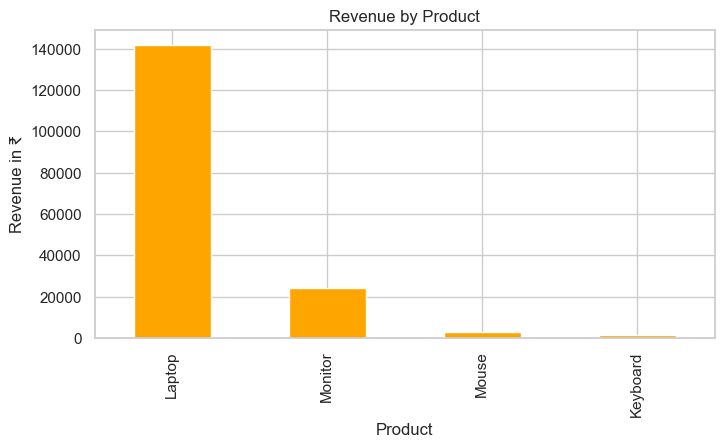

In [6]:
revenue_by_product.plot(kind='bar', color='orange', figsize=(8,4))
plt.title("Revenue by Product")
plt.ylabel("Revenue in ₹")
plt.show()


In [7]:
daily_revenue = df.groupby("Date")["Revenue"].sum()
daily_revenue


Date
2023-01-10    71000
2023-01-11     1500
2023-01-12    96000
2023-01-13     1650
Name: Revenue, dtype: int64

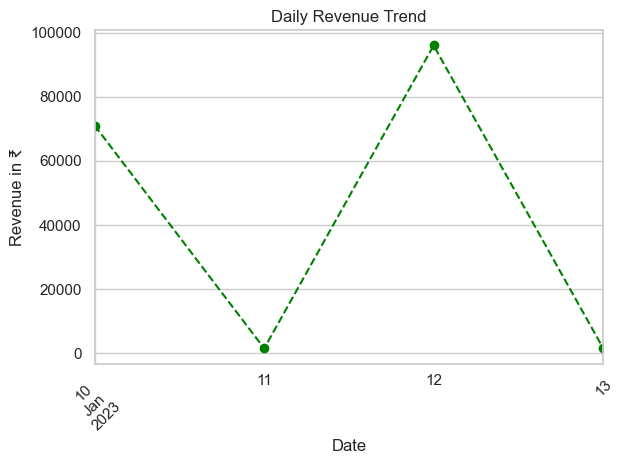

In [8]:
daily_revenue.plot(marker='o', linestyle='--', color='green')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue in ₹")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
category_revenue = df.groupby("Category")["Revenue"].sum()
category_revenue


Category
Accessories      4150
Electronics    166000
Name: Revenue, dtype: int64

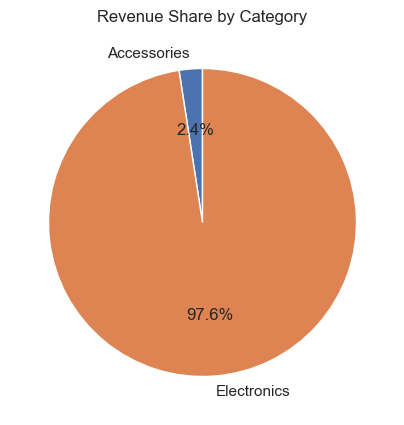

In [10]:
category_revenue.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(5,5))
plt.title("Revenue Share by Category")
plt.ylabel("")
plt.show()


In [11]:
df["Discount"] = [0, 50, 0, 1000, 0, 30]  # Simulate discounts
df["NetRevenue"] = df["Revenue"] - df["Discount"]
df


,OrderID,Product,Category,Price,Quantity,Date,Revenue,Discount,NetRevenue
0,1001,Laptop,Electronics,70000,1,2023-01-10,70000,0,70000
1,1002,Mouse,Accessories,500,2,2023-01-10,1000,50,950
2,1003,Keyboard,Accessories,1500,1,2023-01-11,1500,0,1500
3,1004,Monitor,Electronics,12000,2,2023-01-12,24000,1000,23000
4,1005,Laptop,Electronics,72000,1,2023-01-12,72000,0,72000
5,1006,Mouse,Accessories,550,3,2023-01-13,1650,30,1620


In [12]:
df[["Revenue", "NetRevenue"]].sum()


Revenue       170150
NetRevenue    169070
dtype: int64

In [13]:
df.loc[df["Revenue"].idxmax()]


OrderID                      1005
Product                    Laptop
Category              Electronics
Price                       72000
Quantity                        1
Date          2023-01-12 00:00:00
Revenue                     72000
Discount                        0
NetRevenue                  72000
Name: 4, dtype: object

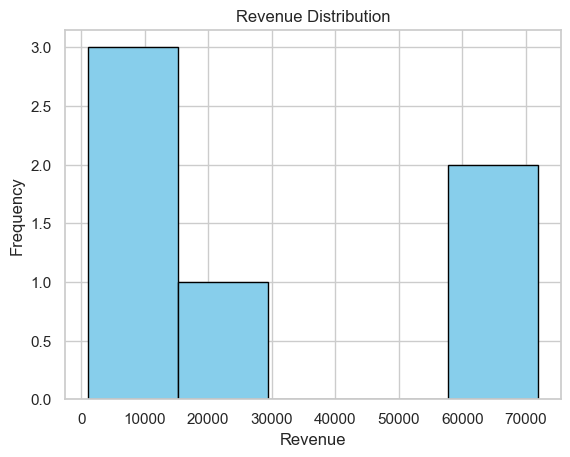

In [14]:
plt.hist(df["Revenue"], bins=5, color="skyblue", edgecolor="black")
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


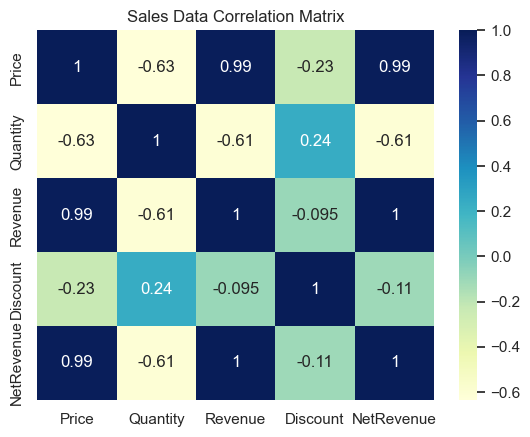

In [15]:
correlation = df[["Price", "Quantity", "Revenue", "Discount", "NetRevenue"]].corr()
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.title("Sales Data Correlation Matrix")
plt.show()


In [16]:
summary = df.groupby("Product")[["Quantity", "Revenue", "Discount", "NetRevenue"]].sum()
summary


,Quantity,Revenue,Discount,NetRevenue
Product,,,,
Keyboard,1,1500,0,1500
Laptop,2,142000,0,142000
Monitor,2,24000,1000,23000
Mouse,5,2650,80,2570
